# Preprocesado csv. 

❗ A continuación, se gestionarán los outliers. En cuanto a los valores nulos, en la exploración se observó que no existían.

🧐 Esta parte tiene gran importancia, pues los outliers son observaciones anormales en nuestros datos que puede afectar potencialmente nuestros análisis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/precio/dflimpio.csv", index_col = 0)
df.head(2)

,edad,Valoración_actual,Progresión,precio,Ataque,Regate,Aceleración,Potencia_tiro,Agresividad,Defensa,Portería
0,21,70,80,3300000,54,47,62,35,65,67,10
1,19,70,83,3800000,59,80,84,65,34,25,7


In [3]:
df_numericas = df.select_dtypes(include=np.number)

In [4]:
df_numericas.head(2)

,edad,Valoración_actual,Progresión,precio,Ataque,Regate,Aceleración,Potencia_tiro,Agresividad,Defensa,Portería
0,21,70,80,3300000,54,47,62,35,65,67,10
1,19,70,83,3800000,59,80,84,65,34,25,7


1️⃣ Se realiza un gráfico de bigotes para observar los outliers con mayor claridad. De este modo, se realizará su posterior tratamiento.

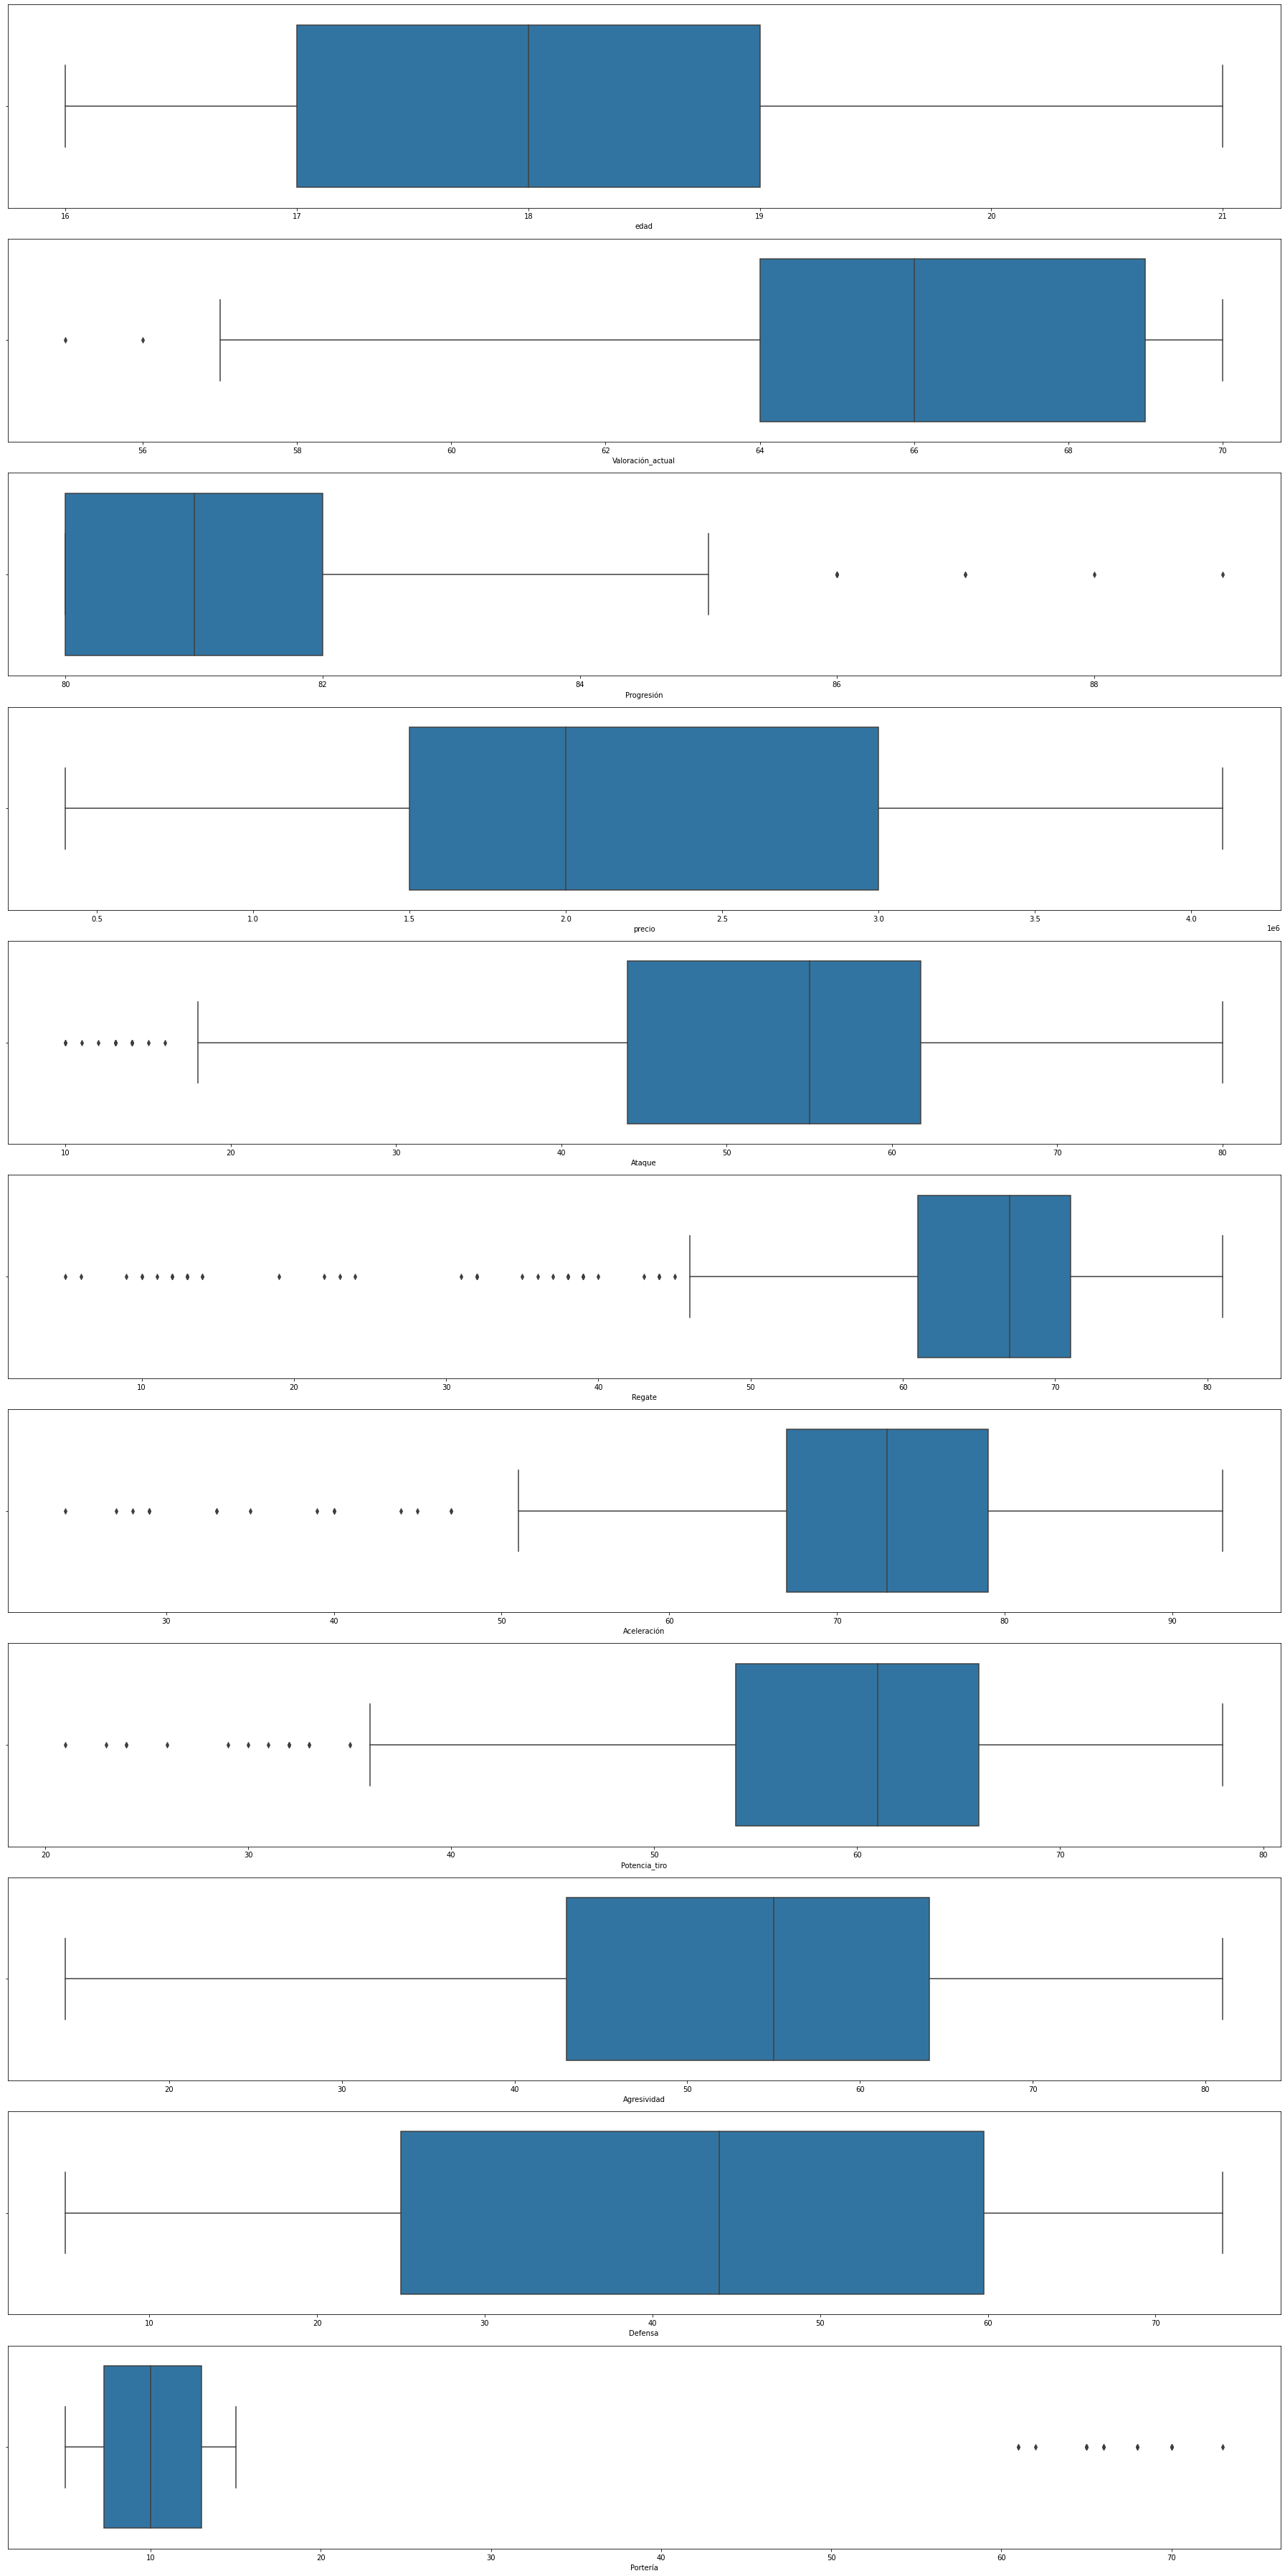

In [5]:
fig, ax = plt.subplots(11, 1, figsize=(25,50))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
    
plt.tight_layout()

plt.show();

2️⃣ A continuación, se eliminan ciertos outliers para una mayor exactitud del modelo. 

Es preciso buscar un equilibrio entre el número de valores de los que disponemos y los outliers eliminados, pues si eliminamos demasiados datos nos quedaríamos sin los necesarios para la realización de un correcto análisis.

In [6]:
df[df['precio'] < 1200000].count()

edad                 65
Valoración_actual    65
Progresión           65
precio               65
Ataque               65
Regate               65
Aceleración          65
Potencia_tiro        65
Agresividad          65
Defensa              65
Portería             65
dtype: int64

In [7]:
df.drop(df[df['precio'] < 1200000].index, inplace=True)

In [8]:
df[df['precio'] > 3300000].count()

edad                 53
Valoración_actual    53
Progresión           53
precio               53
Ataque               53
Regate               53
Aceleración          53
Potencia_tiro        53
Agresividad          53
Defensa              53
Portería             53
dtype: int64

In [9]:
df.drop(df[df['precio'] >3300000].index, inplace=True)

In [10]:
df[df['Progresión'] >= 88].count()

edad                 1
Valoración_actual    1
Progresión           1
precio               1
Ataque               1
Regate               1
Aceleración          1
Potencia_tiro        1
Agresividad          1
Defensa              1
Portería             1
dtype: int64

In [11]:
df.drop(df[df['Progresión']  >= 88].index, inplace=True)

In [12]:
df[df['Ataque'] < 12].count()

edad                 4
Valoración_actual    4
Progresión           4
precio               4
Ataque               4
Regate               4
Aceleración          4
Potencia_tiro        4
Agresividad          4
Defensa              4
Portería             4
dtype: int64

In [13]:
df.drop(df[df['Ataque']  < 12].index, inplace=True)

In [14]:
df[df['Regate'] <= 10].count()

edad                 4
Valoración_actual    4
Progresión           4
precio               4
Ataque               4
Regate               4
Aceleración          4
Potencia_tiro        4
Agresividad          4
Defensa              4
Portería             4
dtype: int64

In [15]:
df.drop(df[df['Regate']  <= 10].index, inplace=True)

In [16]:
df[df['Regate'] <= 12].count()

edad                 2
Valoración_actual    2
Progresión           2
precio               2
Ataque               2
Regate               2
Aceleración          2
Potencia_tiro        2
Agresividad          2
Defensa              2
Portería             2
dtype: int64

In [17]:
df.drop(df[df['Regate']  <= 12].index, inplace=True)

In [18]:
df[df['Aceleración'] <= 30].count()

edad                 2
Valoración_actual    2
Progresión           2
precio               2
Ataque               2
Regate               2
Aceleración          2
Potencia_tiro        2
Agresividad          2
Defensa              2
Portería             2
dtype: int64

In [19]:
df.drop(df[df['Aceleración']  <= 30].index, inplace=True)

In [21]:
df[df['Potencia_tiro'] <= 23].count()

edad                 1
Valoración_actual    1
Progresión           1
precio               1
Ataque               1
Regate               1
Aceleración          1
Potencia_tiro        1
Agresividad          1
Defensa              1
Portería             1
dtype: int64

In [22]:
df.drop(df[df['Potencia_tiro']  <= 23].index, inplace=True)

3️⃣ Ploteamos de nuevo el gráfico de boxplot para observar la nueva distribución de los datos.

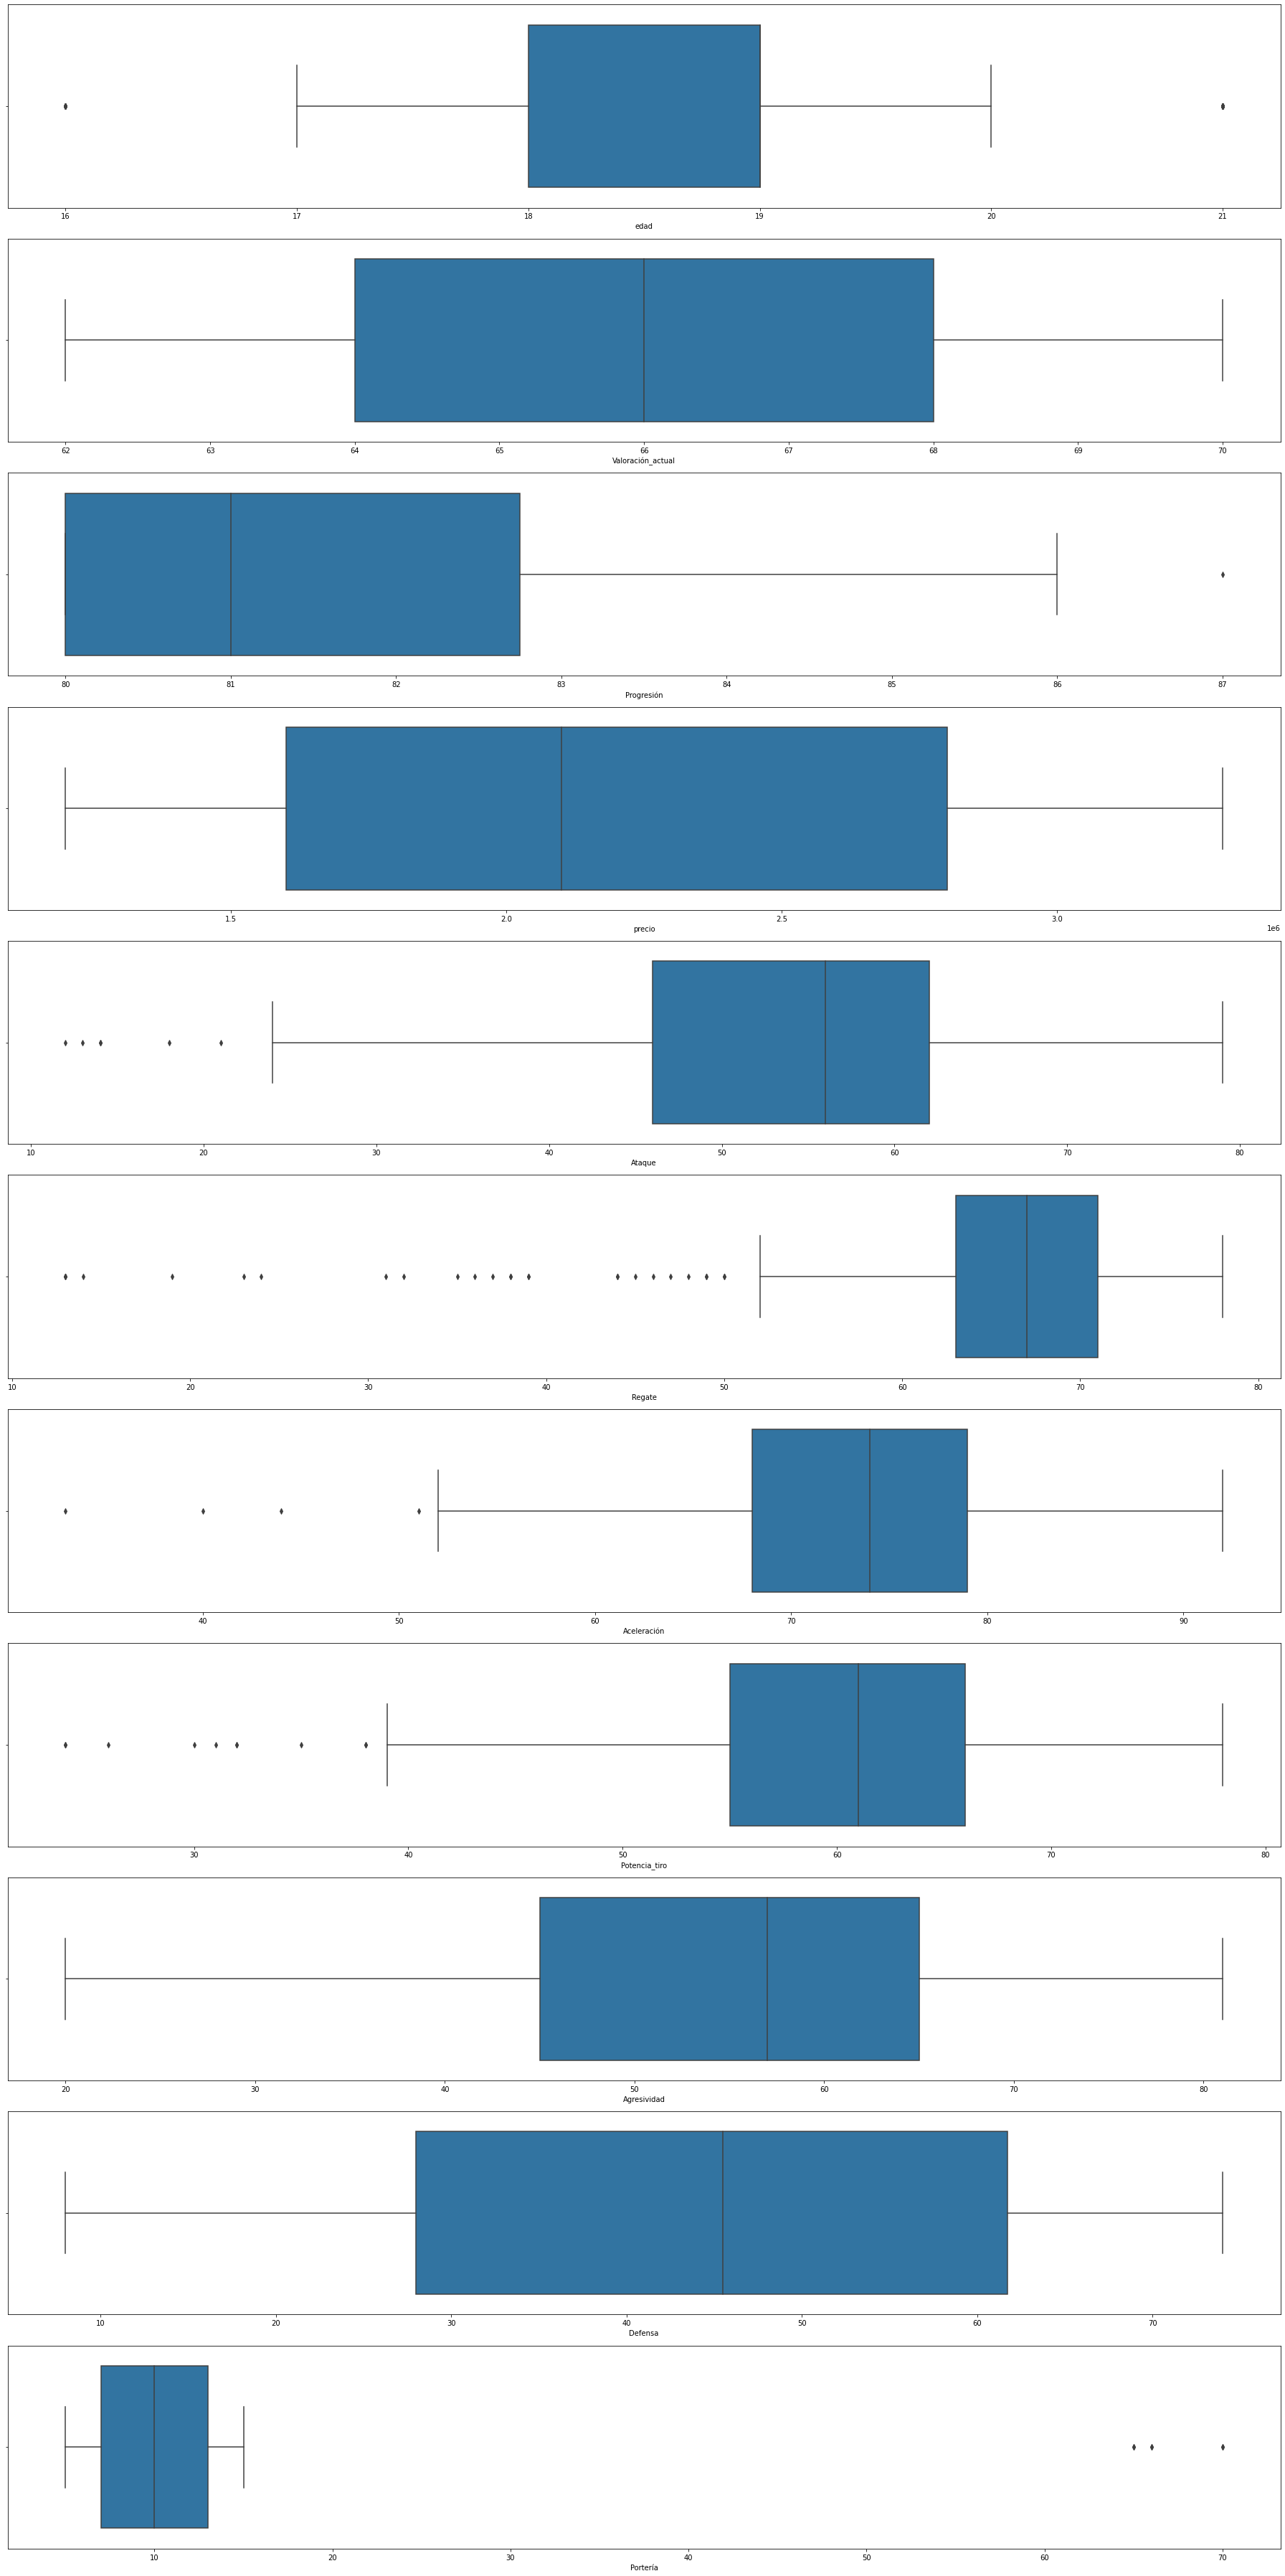

In [23]:
fig, ax = plt.subplots(11, 1, figsize=(25,50))

for i in range(len(df.columns)):
    sns.boxplot(x=df.columns[i], data=df, ax=ax[i])
    
plt.tight_layout()

plt.show()

4️⃣ Guardamos el dataframe con los outliers eliminados.

In [24]:
df.to_csv('../../data/precio/dfproc.csv')